In [ ]:
Germany vs EU - A Data-Driven Energy Transition Analysis (1990–2023).

In [ ]:
Introduction

This project compares energy consumption trends in Germany with the European Union (EU-27) from 1990 to 2023. The aim is to:

- Analyse the shift from fossil fuels to renewable energy.
- Identify how Germany’s energy transition compares with EU averages.
- Visualise changes in energy source contributions over time.
- Highlight policy impacts (like Energiewende, Paris Agreement) in the energy landscape.

We have used Eurostat’s `nrg_bal_c` dataset and visualised major fuel categories: bioenergy, solar, wind, nuclear, gas, etc.


In [31]:
# Step: Load the Raw Dataset  
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv("../data/estat_nrg_bal_c_filtered_en.csv")
df.head()


,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1990,363.022,NaN,NaN
1,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1991,363.022,NaN,NaN
2,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1992,363.022,NaN,NaN
3,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1993,346.494,NaN,NaN
4,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1994,330.730,NaN,NaN


In [51]:
# Step: Load Renewable Share Dataset (nrg_ind_ren_eu_vs_de_2_0)
# This dataset contains the percentage share of energy from renewable sources in gross final energy consumption, as reported by Eurostat.

renew_share = pd.read_csv("../data/nrg_ind_ren_eu_vs_de_2_0.csv")
renew_share.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2004,NaN,6.207,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2005,NaN,7.167,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2006,NaN,8.466,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2007,NaN,10.039,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2008,NaN,10.072,NaN,NaN,NaN,NaN,NaN


In [52]:
# Filter Relevant Data (Germany + EU)  

# Select relevant columns
df = df[['TIME_PERIOD', 'geo', 'siec', 'OBS_VALUE']]
df.head()

# Split into Germany and EU
germany_df = df[df['geo'] == "Germany"]
eu_df = df[df['geo'] == "European Union - 27 countries (from 2020)"]

# Save for reuse
germany_df.to_csv("../data/germany_energy.csv", index=False)
eu_df.to_csv("../data/eu_energy.csv", index=False)


In [53]:
# Step: Filter & Clean Renewables Share Dataset: nrg_ind_ren_eu_vs_de_2_0 (Germany vs EU)

# 1. Filter only Germany and EU
renew_share_filtered = renew_share[
    renew_share['Geopolitical entity (reporting)'].isin([
        'Germany', 'European Union - 27 countries (from 2020)'
    ])
]

# 2. Select and Rename relevant columns
renew_share_filtered = renew_share_filtered[
    ['TIME_PERIOD', 'Geopolitical entity (reporting)', 'OBS_VALUE']
].rename(columns={
    'TIME_PERIOD': 'Year',
    'Geopolitical entity (reporting)': 'Region',
    'OBS_VALUE': 'Renewables Share (%)'
})

# 3. Sort for neatness
renew_share_filtered = renew_share_filtered.sort_values(by=['Region', 'Year'])

# 4. Preview cleaned data
renew_share_filtered.head(10)  # Optional: show more rows




,Year,Region,Renewables Share (%)
20,2004,European Union - 27 countries (from 2020),9.605
21,2005,European Union - 27 countries (from 2020),10.182
22,2006,European Union - 27 countries (from 2020),10.778
23,2007,European Union - 27 countries (from 2020),11.749
24,2008,European Union - 27 countries (from 2020),12.552
25,2009,European Union - 27 countries (from 2020),13.850
26,2010,European Union - 27 countries (from 2020),14.405
27,2011,European Union - 27 countries (from 2020),14.547
28,2012,European Union - 27 countries (from 2020),16.002
29,2013,European Union - 27 countries (from 2020),16.659


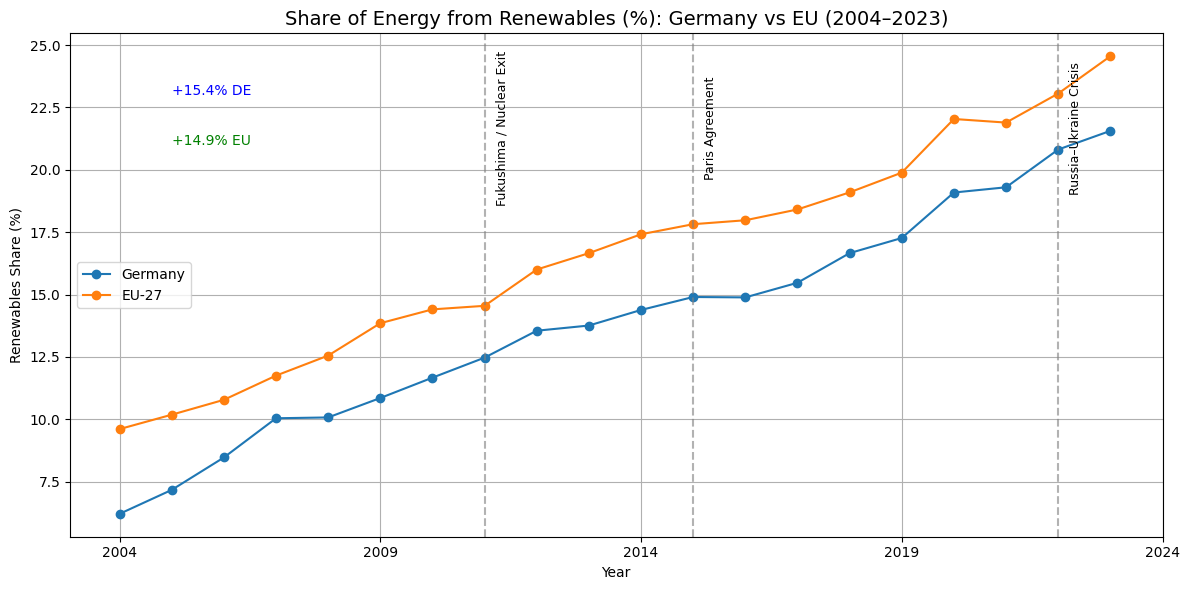

In [60]:
# 📊 Germany vs EU – Share of Energy from Renewables (2004–2023)

plt.figure(figsize=(12, 6))

# Germany
plt.plot(
    renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Year"],
    renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Renewables Share (%)"],
    label="Germany", marker='o'
)

# EU-27
plt.plot(
    renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Year"],
    renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Renewables Share (%)"],
    label="EU-27", marker='o'
)

plt.title("Share of Energy from Renewables (%): Germany vs EU (2004–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Renewables Share (%)")
plt.grid(True)
plt.legend()

# % increase annotation
y_de = renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Renewables Share (%)"]
y_eu = renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Renewables Share (%)"]

plt.text(2005, 23, f"+{(y_de.iloc[-1] - y_de.iloc[0]):.1f}% DE", color='blue')
plt.text(2005, 21, f"+{(y_eu.iloc[-1] - y_eu.iloc[0]):.1f}% EU", color='green')

# Add policy/event annotations
events = {
    2011: "Fukushima / Nuclear Exit",
    2015: "Paris Agreement",
    2022: "Russia–Ukraine Crisis",
}

for year, label in events.items():
    if year in renew_share_filtered["Year"].values:
        plt.axvline(x=year, color='grey', linestyle='--', alpha=0.6)
        plt.text(year + 0.2, plt.ylim()[1]*0.85, label, rotation=90, verticalalignment='center', fontsize=9)

# Save updated visual
plt.xticks(ticks=range(2004, 2024 + 1, 5))
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_renewables_share_annotated.png", dpi=300)
plt.show()


In [36]:
### 📊 Insights: Share of Energy from Renewables (%): Germany vs EU (2004–2023)

#- **Steady Growth: Both Germany and the EU-27 have shown a consistent increase in the share of energy from renewables over the years.
#- **Germany Leads**: Germany has consistently maintained a higher share than the EU average, especially post-2010.

#- **Key Surges**:
#  - Germany saw sharp gains between **2010 and 2014**, likely influenced by the **Energiewende** (Energy Transition policy).
#  - The EU growth also accelerated after **2015**, reflecting broader adoption of renewable targets under EU-wide directives.

#- **2022–2023 Spike**: A noticeable rise in both Germany and the EU post-2021 possibly reflects energy diversification after the **Russia-Ukraine energy crisis**.

#- **Overall Increase**:
#  - Germany grew from **~6.2% in 2004** to **~24.6% in 2023** — a **~4x increase**.
#  - EU rose from **~9.6% to ~24.5%** in the same period — a **~2.5x increase**.


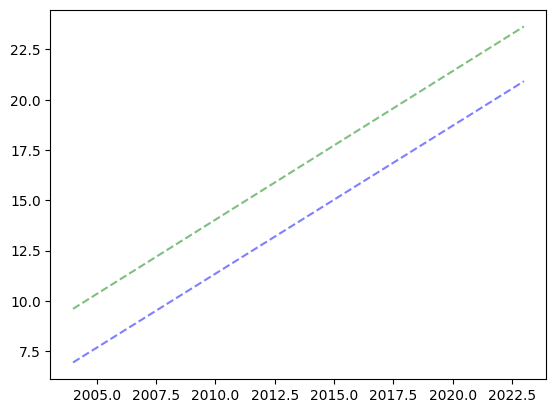

In [37]:
import numpy as np

# Germany trendline
germany_data = renew_share_filtered[renew_share_filtered["Region"] == "Germany"]
x_de = germany_data["Year"]
y_de = germany_data["Renewables Share (%)"]
z_de = np.polyfit(x_de, y_de, 1)
p_de = np.poly1d(z_de)
plt.plot(x_de, p_de(x_de), linestyle='--', color='blue', alpha=0.5, label='Germany Trend')

# EU trendline
eu_data = renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]
x_eu = eu_data["Year"]
y_eu = eu_data["Renewables Share (%)"]
z_eu = np.polyfit(x_eu, y_eu, 1)
p_eu = np.poly1d(z_eu)
plt.plot(x_eu, p_eu(x_eu), linestyle='--', color='green', alpha=0.5, label='EU Trend')


In [40]:
# Pivot Data : Fuel Types as Columns 

# Pivot both datasets
germany_pivot = germany_df.pivot(index='TIME_PERIOD', columns='siec', values='OBS_VALUE').reset_index()
eu_pivot = eu_df.pivot(index='TIME_PERIOD', columns='siec', values='OBS_VALUE').reset_index()

# Clean column names or filter only selected fuels
germany_pivot.columns
eu_pivot.columns


Index(['TIME_PERIOD', 'Bioenergy', 'Charcoal', 'Crude oil', 'Electricity',
       'Fossil energy', 'Geothermal', 'Heat', 'Hydro', 'Lignite',
       'Natural gas', 'Natural gas liquids', 'Nuclear heat',
       'Oil and petroleum products (excluding biofuel portion)', 'Peat',
       'Primary solid biofuels', 'Renewables and biofuels', 'Solar thermal',
       'Solid fossil fuels', 'Tide, wave, ocean', 'Wind'],
      dtype='object', name='siec')

In [41]:
# Save pivoted data for reuse
germany_pivot.to_csv("../data/germany_energy.csv", index=False)
eu_pivot.to_csv("../data/eu_energy.csv", index=False)


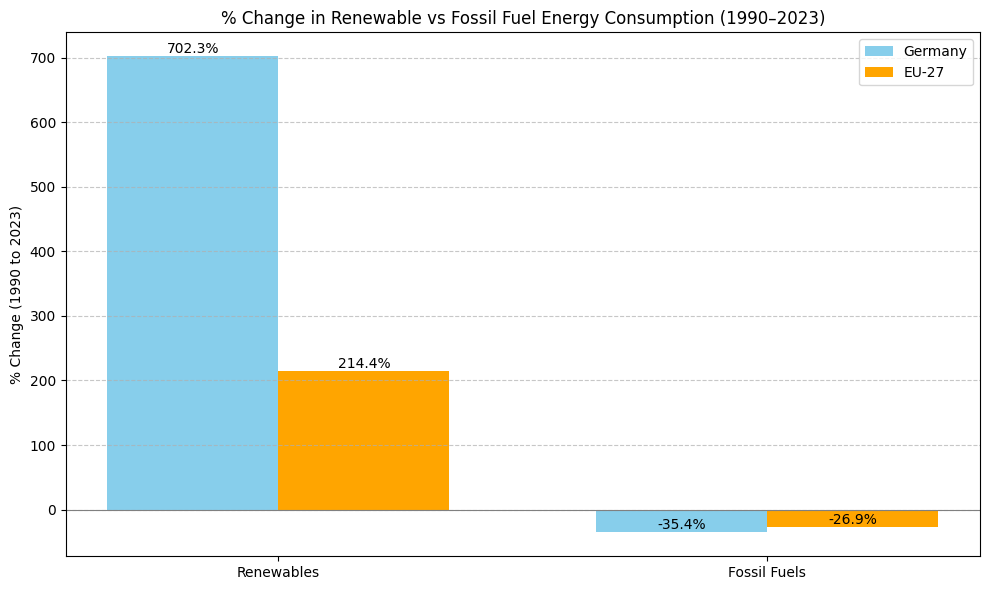

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 1: Recalculate Total Renewables and Fossils if not already present ---

# For Germany
germany_summary = germany_pivot.copy()
germany_summary["Total Renewables"] = (
    germany_summary["Bioenergy"] +
    germany_summary["Wind"] +
    germany_summary["Hydro"] +
    germany_summary["Solar thermal"] +
    germany_summary["Geothermal"]
)

germany_summary["Total Fossil"] = (
    germany_summary["Solid fossil fuels"] +
    germany_summary["Oil and petroleum products (excluding biofuel portion)"] +
    germany_summary["Natural gas"]
)

# For EU
eu_summary = eu_pivot.copy()
eu_summary["Total Renewables"] = (
    eu_summary["Bioenergy"] +
    eu_summary["Wind"] +
    eu_summary["Hydro"] +
    eu_summary["Solar thermal"] +
    eu_summary["Geothermal"]
)

eu_summary["Total Fossil"] = (
    eu_summary["Solid fossil fuels"] +
    eu_summary["Oil and petroleum products (excluding biofuel portion)"] +
    eu_summary["Natural gas"]
)

# --- STEP 2: Calculate % Change (1990 to 2023) ---

def get_percentage_change(df, col_name):
    initial = df[df["TIME_PERIOD"] == 1990][col_name].values[0]
    final = df[df["TIME_PERIOD"] == 2023][col_name].values[0]
    return ((final - initial) / initial) * 100

# Germany
ger_renew_change = get_percentage_change(germany_summary, "Total Renewables")
ger_fossil_change = get_percentage_change(germany_summary, "Total Fossil")

# EU
eu_renew_change = get_percentage_change(eu_summary, "Total Renewables")
eu_fossil_change = get_percentage_change(eu_summary, "Total Fossil")

# --- STEP 3: Plot Grouped Bar Chart ---

labels = ['Renewables', 'Fossil Fuels']
germany_values = [ger_renew_change, ger_fossil_change]
eu_values = [eu_renew_change, eu_fossil_change]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, germany_values, width, label='Germany', color='skyblue')
bars2 = plt.bar(x + width/2, eu_values, width, label='EU-27', color='orange')

plt.ylabel('% Change (1990 to 2023)')
plt.title('% Change in Renewable vs Fossil Fuel Energy Consumption (1990–2023)')
plt.xticks(x, labels)
plt.axhline(0, color='gray', linewidth=0.8)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Save & Show
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_renew_fossil_change.png", dpi=300)
plt.show()


In [44]:
###INSIGHTS
#
#
#

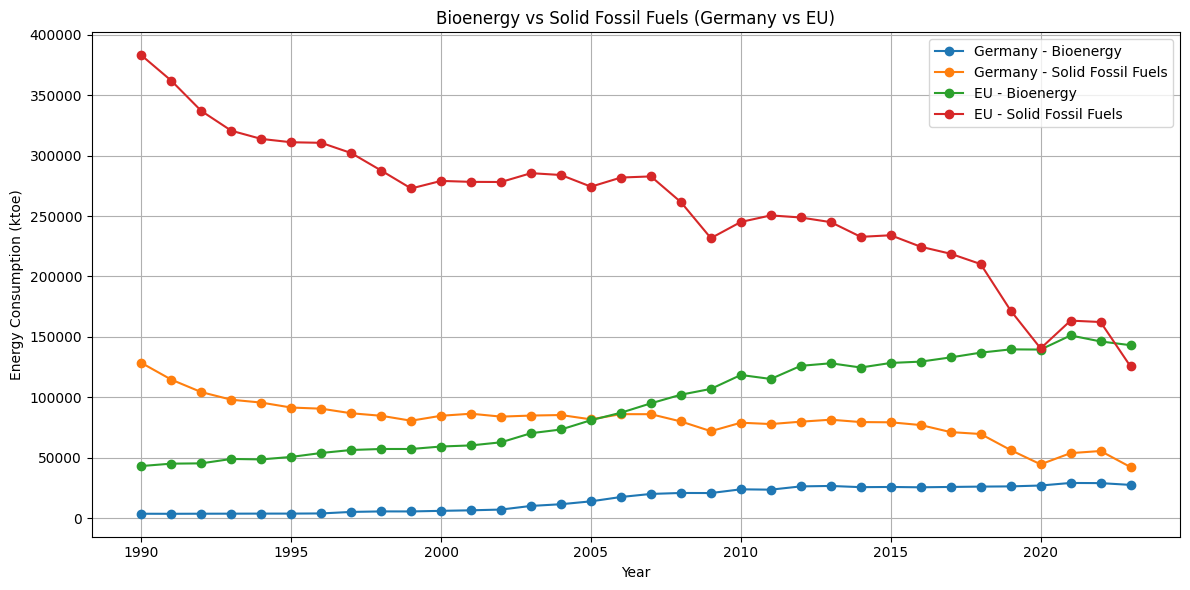

In [5]:
#Germany vs EU – Bioenergy vs Solid Fossil Fuels  


plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Bioenergy'], label='Germany - Bioenergy', marker='o')
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Solid fossil fuels'], label='Germany - Solid Fossil Fuels', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Bioenergy'], label='EU - Bioenergy', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Solid fossil fuels'], label='EU - Solid Fossil Fuels', marker='o')

plt.title('Bioenergy vs Solid Fossil Fuels (Germany vs EU)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (ktoe)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/bio_vs_fossil.png")
plt.show()
 

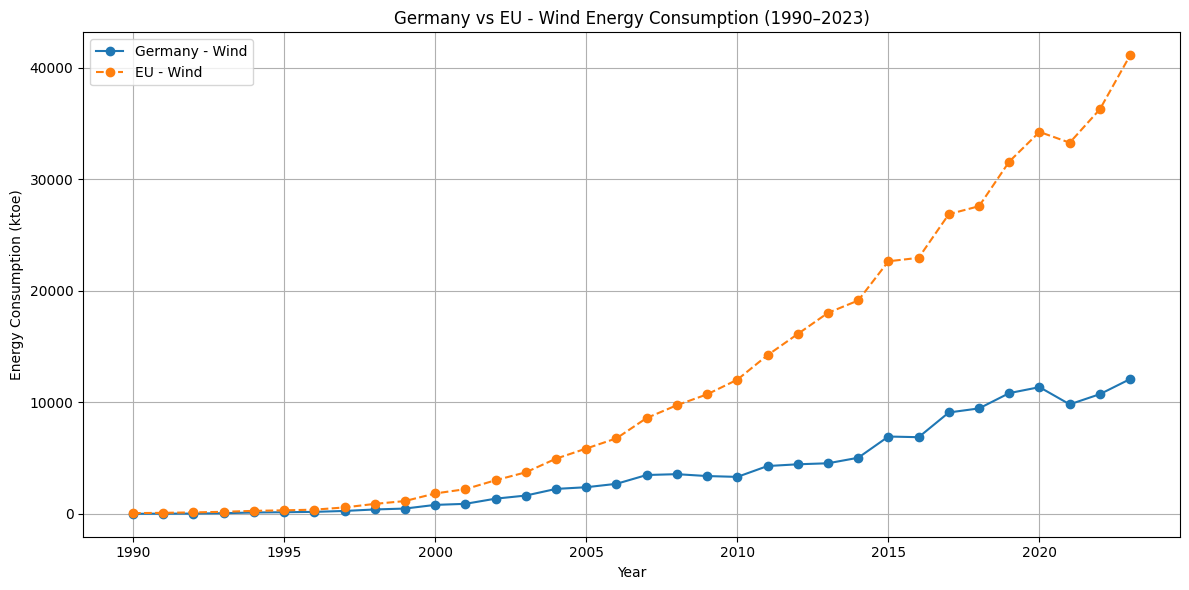

In [37]:
# Germany vs EU - Wind Energy Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Wind'], marker='o', label='Germany - Wind')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Wind'], marker='o', linestyle='--', label='EU - Wind')

plt.title("Germany vs EU - Wind Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_wind.png")
plt.show()


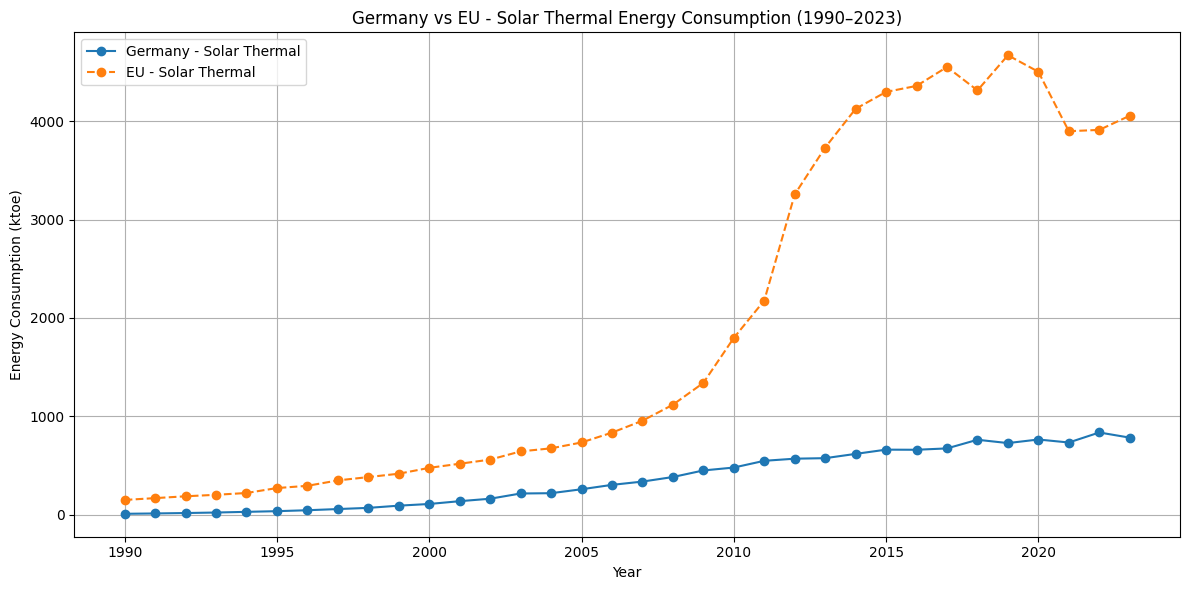

In [38]:
# Germany vs EU - Solar Thermal Energy Comparison
plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Solar thermal'], marker='o', label='Germany - Solar Thermal')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Solar thermal'], marker='o', linestyle='--', label='EU - Solar Thermal')

plt.title("Germany vs EU - Solar Thermal Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_solar_thermal.png")
plt.show()


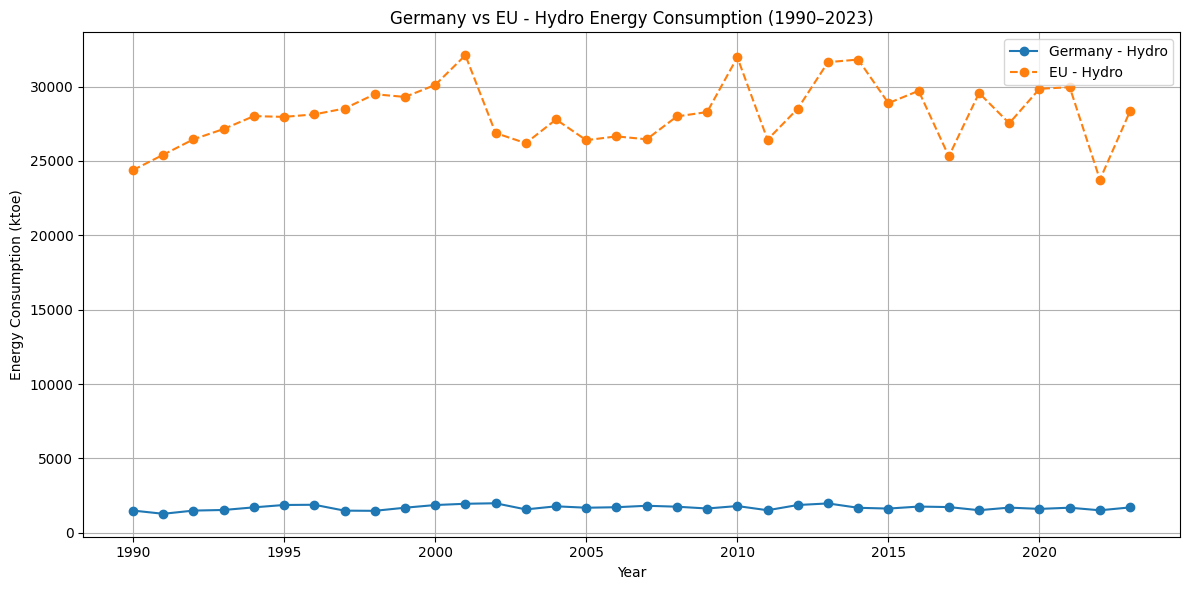

In [39]:
# Germany vs EU - Hydro Energy Comparison
plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Hydro'], marker='o', label='Germany - Hydro')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Hydro'], marker='o', linestyle='--', label='EU - Hydro')

plt.title("Germany vs EU - Hydro Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_hydro.png")
plt.show()


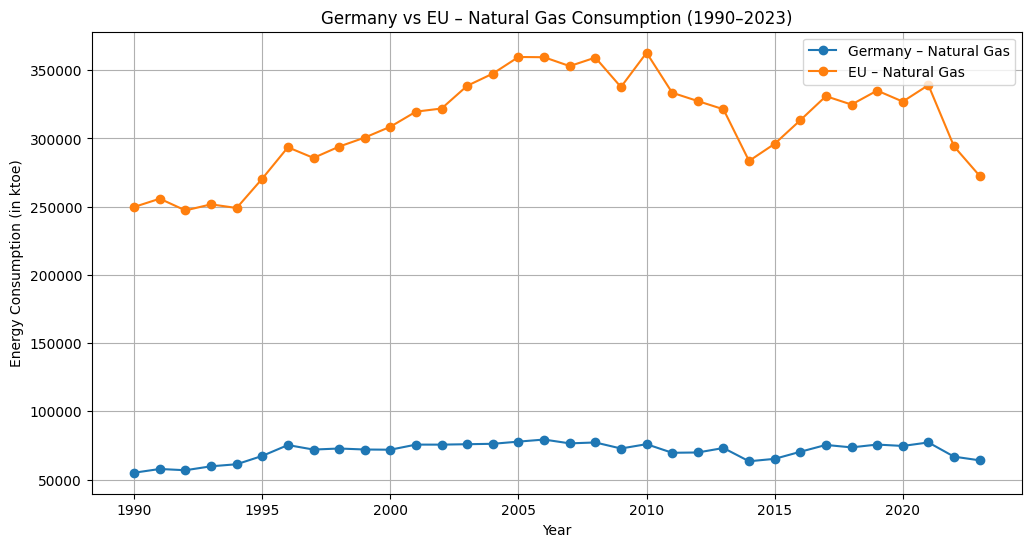

In [9]:
# 📊 Germany vs EU – Natural Gas Consumption (1990–2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Natural gas'], label='Germany – Natural Gas', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Natural gas'], label='EU – Natural Gas', marker='o')

plt.title('Germany vs EU – Natural Gas Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_natural_gas.png', bbox_inches='tight')
plt.show()


In [ ]:
### 🔹 Germany vs EU – Natural Gas Consumption (1990–2023)

(Insight to be written later...)
Insight can be written later, e.g., “EU’s spike in 2022 likely reflects Russia-Ukraine crisis impact...”

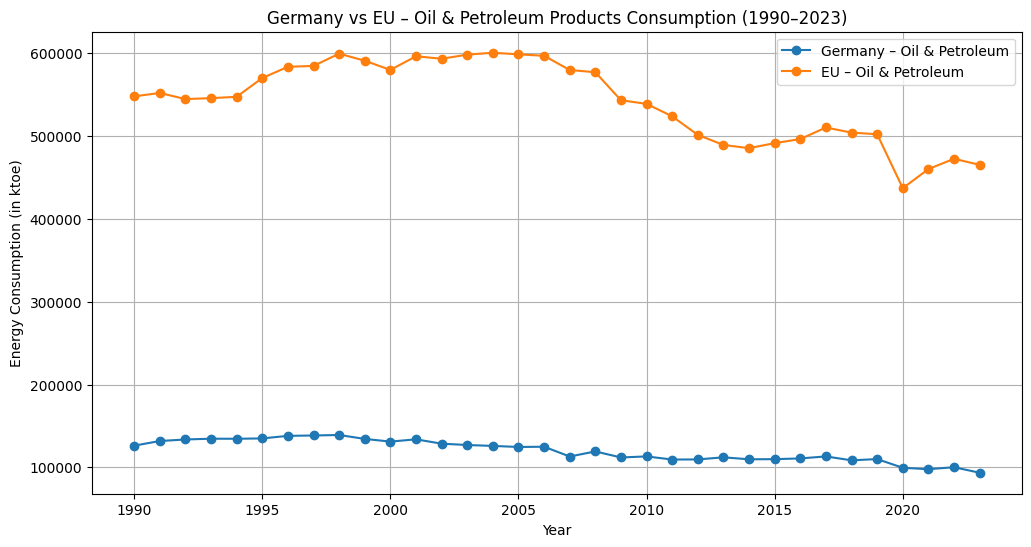

In [13]:
# 📊 Germany vs EU – Oil & Petroleum Products Consumption (1990–2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Oil and petroleum products (excluding biofuel portion)'], 
         label='Germany – Oil & Petroleum', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Oil and petroleum products (excluding biofuel portion)'], 
         label='EU – Oil & Petroleum', marker='o')

plt.title('Germany vs EU – Oil & Petroleum Products Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_oil_petroleum.png', bbox_inches='tight')
plt.show()


In [ ]:
### 🔹 Germany vs EU – Oil & Petroleum Products Consumption (1990–2023)

(Insight to be written later...)
💡 This chart will help you investigate questions like:

“Why has oil consumption remained stable or high despite the push toward renewables?”

“Is Germany reducing oil faster than the EU?”


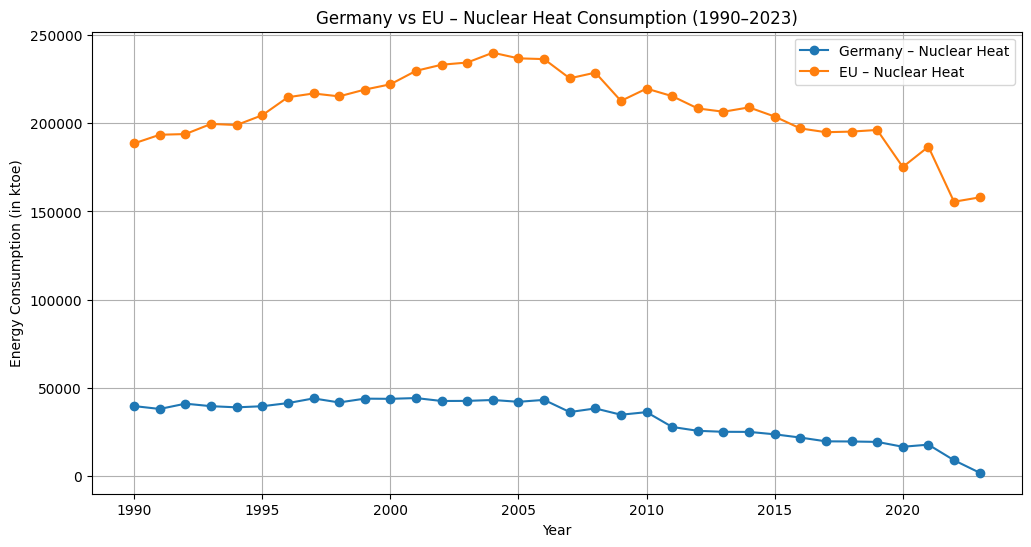

In [14]:
# 📊 Germany vs EU – Nuclear Heat Consumption (1990–2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Nuclear heat'], 
         label='Germany – Nuclear Heat', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Nuclear heat'], 
         label='EU – Nuclear Heat', marker='o')

plt.title('Germany vs EU – Nuclear Heat Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_nuclear_heat.png', bbox_inches='tight')
plt.show()


In [15]:
### 🔹 Germany vs EU – Nuclear Heat Consumption (1990–2023)

#_(Insight to be added later...)_

#Germany phased out nuclear post-2011, while EU nuclear trends remained steady.

#Can link this to policy decisions like Energiewende and Fukushima reaction.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2970079334.py, line 3)

In [16]:
# Calculate total energy consumption per year (excluding TIME_PERIOD)
germany_total = germany_pivot.copy()
germany_total['Total Energy'] = germany_total.drop(columns='TIME_PERIOD').sum(axis=1)

eu_total = eu_pivot.copy()
eu_total['Total Energy'] = eu_total.drop(columns='TIME_PERIOD').sum(axis=1)


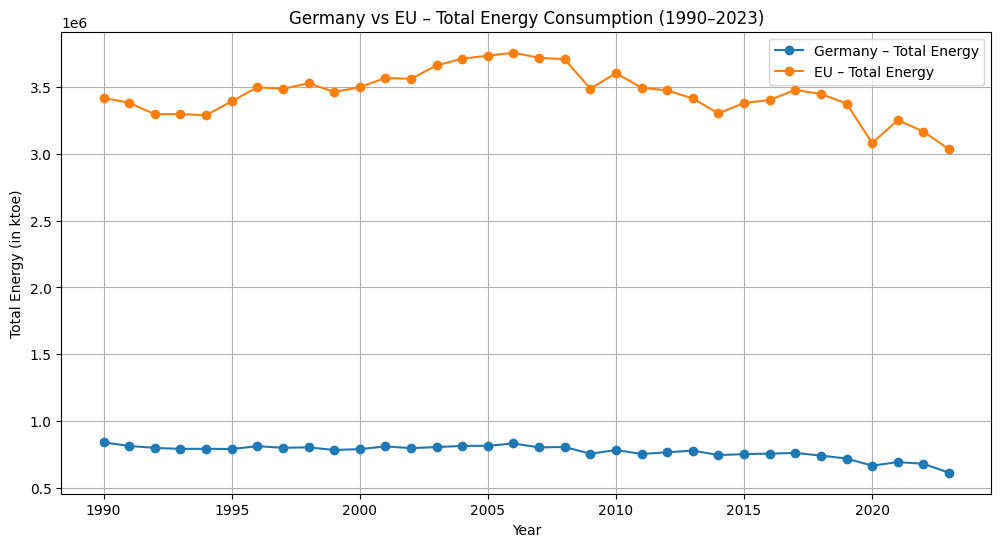

In [17]:
# 📊 Germany vs EU – Total Energy Consumption

plt.figure(figsize=(12, 6))
plt.plot(germany_total['TIME_PERIOD'], germany_total['Total Energy'], 
         label='Germany – Total Energy', marker='o')
plt.plot(eu_total['TIME_PERIOD'], eu_total['Total Energy'], 
         label='EU – Total Energy', marker='o')

plt.title('Germany vs EU – Total Energy Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Total Energy (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_total_energy.png', bbox_inches='tight')
plt.show()


In [ ]:
### 🔹 Germany vs EU – Total Energy Consumption (1990–2023)

_(Insight to be added later...)_


In [ ]:
#Total Renewable vs Fossil Energy Trends

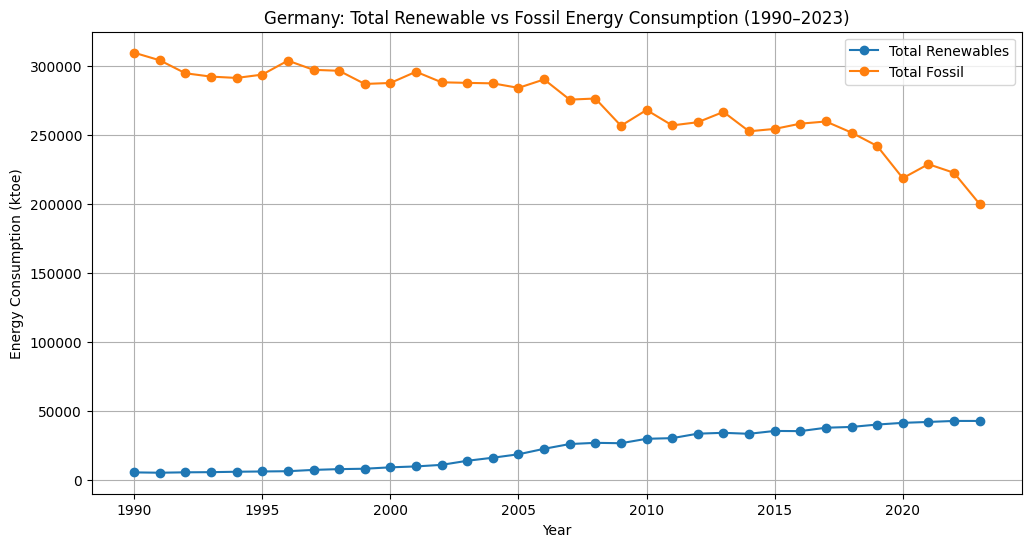

In [40]:
#Germany - Total Renewable vs Fossil Fuels

# Make a copy to work with
germany_plot = germany_pivot.copy()

# Add Total Renewable column
germany_plot["Total Renewables"] = (
    germany_plot["Bioenergy"] +
    germany_plot["Wind"] +
    germany_plot["Hydro"] +
    germany_plot["Solar thermal"] +
    germany_plot["Geothermal"]
)

# Add Total Fossil column
germany_plot["Total Fossil"] = (
    germany_plot["Solid fossil fuels"] +
    germany_plot["Oil and petroleum products (excluding biofuel portion)"] +
    germany_plot["Natural gas"]
)

# Plot
germany_plot.set_index("TIME_PERIOD")[["Total Renewables", "Total Fossil"]].plot(
    figsize=(12, 6),
    marker='o',
    title="Germany: Total Renewable vs Fossil Energy Consumption (1990–2023)"
)

plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("../visuals/germany_total_renewable_vs_fossil.png", dpi=300, bbox_inches='tight')
plt.show()




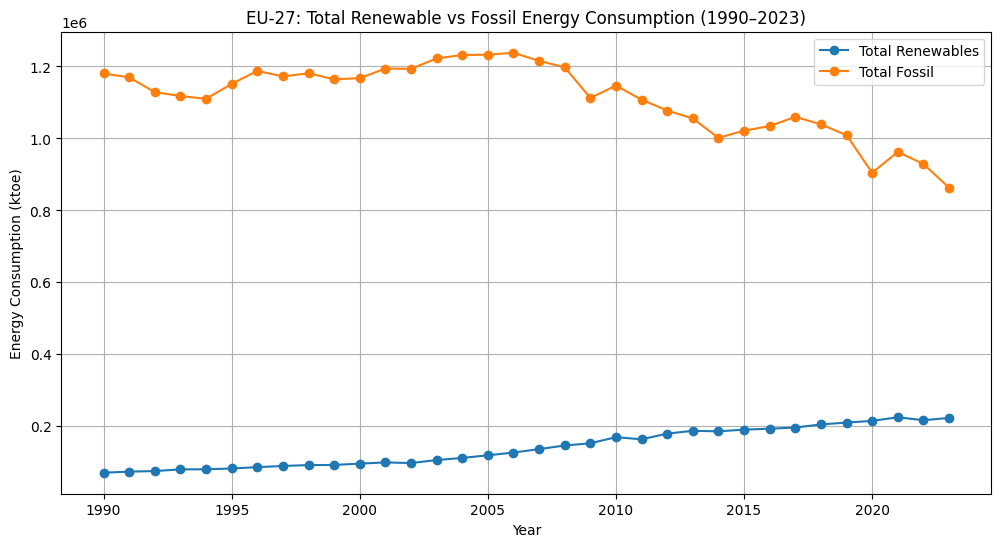

In [41]:
#EU – Total Renewable vs Fossil Fuels

# Make a copy to work with
eu_plot = eu_pivot.copy()

# Add Total Renewable column
eu_plot["Total Renewables"] = (
    eu_plot["Bioenergy"] +
    eu_plot["Wind"] +
    eu_plot["Hydro"] +
    eu_plot["Solar thermal"] +
    eu_plot["Geothermal"]
)

# Add Total Fossil column
eu_plot["Total Fossil"] = (
    eu_plot["Solid fossil fuels"] +
    eu_plot["Oil and petroleum products (excluding biofuel portion)"] +
    eu_plot["Natural gas"]
)

# Plot
eu_plot.set_index("TIME_PERIOD")[["Total Renewables", "Total Fossil"]].plot(
    figsize=(12, 6),
    marker='o',
    title="EU-27: Total Renewable vs Fossil Energy Consumption (1990–2023)"
)

plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("../visuals/eu_total_renewable_vs_fossil.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Policy & Crisis Impact on Energy Shift  

In [43]:
# Create Germany Total Renewable and Fossil DataFrame
germany_renew_fossil = germany_pivot.copy()
germany_renew_fossil['Total Renewable'] = (
    germany_renew_fossil['Bioenergy'] +
    germany_renew_fossil['Wind'] +
    germany_renew_fossil['Hydro'] +
    germany_renew_fossil['Solar thermal'] +
    germany_renew_fossil['Geothermal']
)
germany_renew_fossil['Total Fossil'] = (
    germany_renew_fossil['Solid fossil fuels'] +
    germany_renew_fossil['Natural gas'] +
    germany_renew_fossil['Oil and petroleum products (excluding biofuel portion)']
)


In [44]:
# Create EU Total Renewable and Fossil DataFrame
eu_renew_fossil = eu_pivot.copy()
eu_renew_fossil['Total Renewable'] = (
    eu_renew_fossil['Bioenergy'] +
    eu_renew_fossil['Wind'] +
    eu_renew_fossil['Hydro'] +
    eu_renew_fossil['Solar thermal'] +
    eu_renew_fossil['Geothermal']
)
eu_renew_fossil['Total Fossil'] = (
    eu_renew_fossil['Solid fossil fuels'] +
    eu_renew_fossil['Natural gas'] +
    eu_renew_fossil['Oil and petroleum products (excluding biofuel portion)']
)


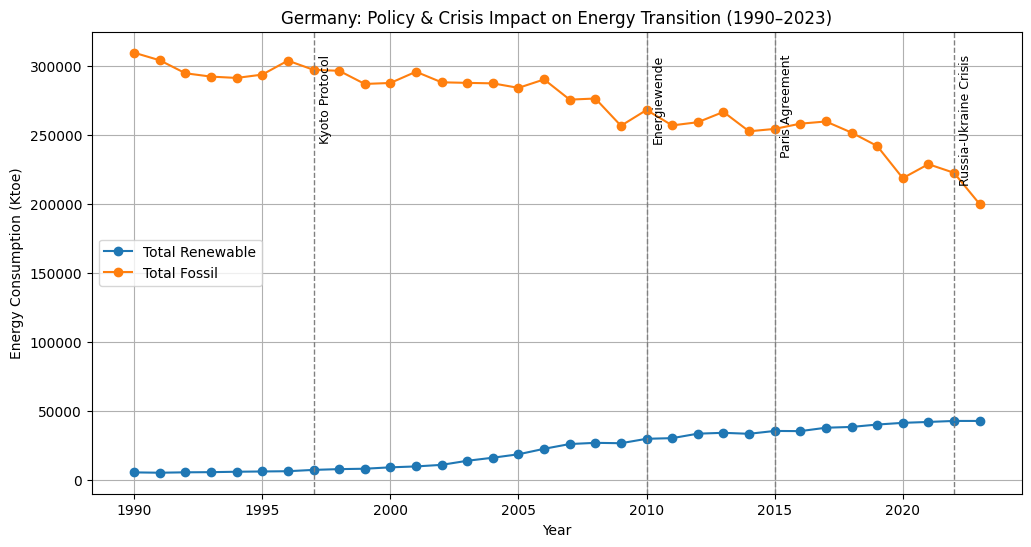

In [45]:
import matplotlib.pyplot as plt

# Plot Germany's Total Renewable vs Fossil with policy annotations
plt.figure(figsize=(12, 6))

plt.plot(germany_renew_fossil['TIME_PERIOD'], germany_renew_fossil['Total Renewable'], label='Total Renewable', marker='o')
plt.plot(germany_renew_fossil['TIME_PERIOD'], germany_renew_fossil['Total Fossil'], label='Total Fossil', marker='o')

# Add policy/event lines
policy_events = {
    1997: "Kyoto Protocol",
    2010: "Energiewende",
    2015: "Paris Agreement",
    2022: "Russia-Ukraine Crisis"
}

for year, label in policy_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90, verticalalignment='top', fontsize=9)

plt.title("Germany: Policy & Crisis Impact on Energy Transition (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend()
plt.grid(True)

# Save to visuals/
plt.savefig("../visuals/germany_policy_impact.png", bbox_inches='tight')
plt.show()


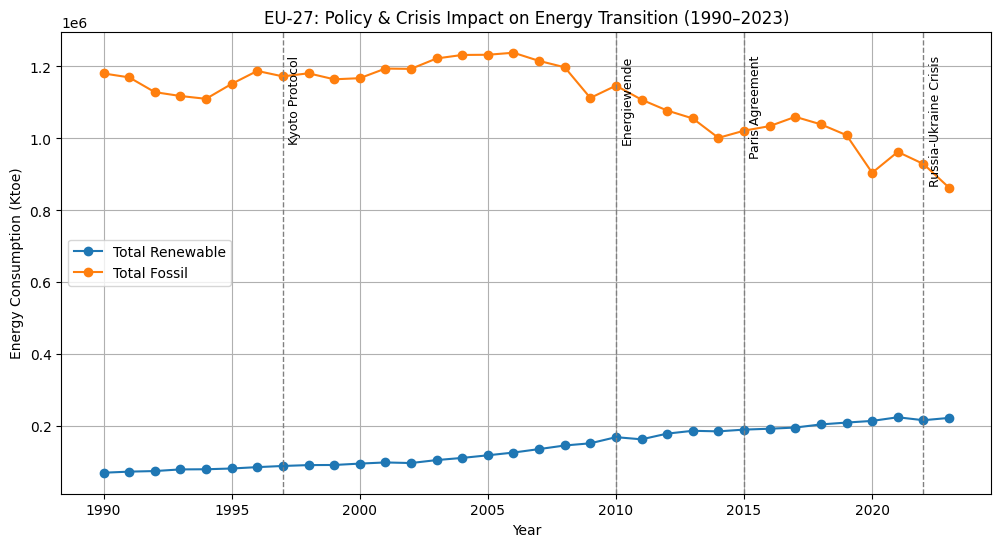

In [46]:
# Plot EU's Total Renewable vs Fossil with policy annotations
plt.figure(figsize=(12, 6))

plt.plot(eu_renew_fossil['TIME_PERIOD'], eu_renew_fossil['Total Renewable'], label='Total Renewable', marker='o')
plt.plot(eu_renew_fossil['TIME_PERIOD'], eu_renew_fossil['Total Fossil'], label='Total Fossil', marker='o')

# Reuse the same events
for year, label in policy_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90, verticalalignment='top', fontsize=9)

plt.title("EU-27: Policy & Crisis Impact on Energy Transition (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend()
plt.grid(True)

# Save to visuals/
plt.savefig("../visuals/eu_policy_impact.png", bbox_inches='tight')
plt.show()


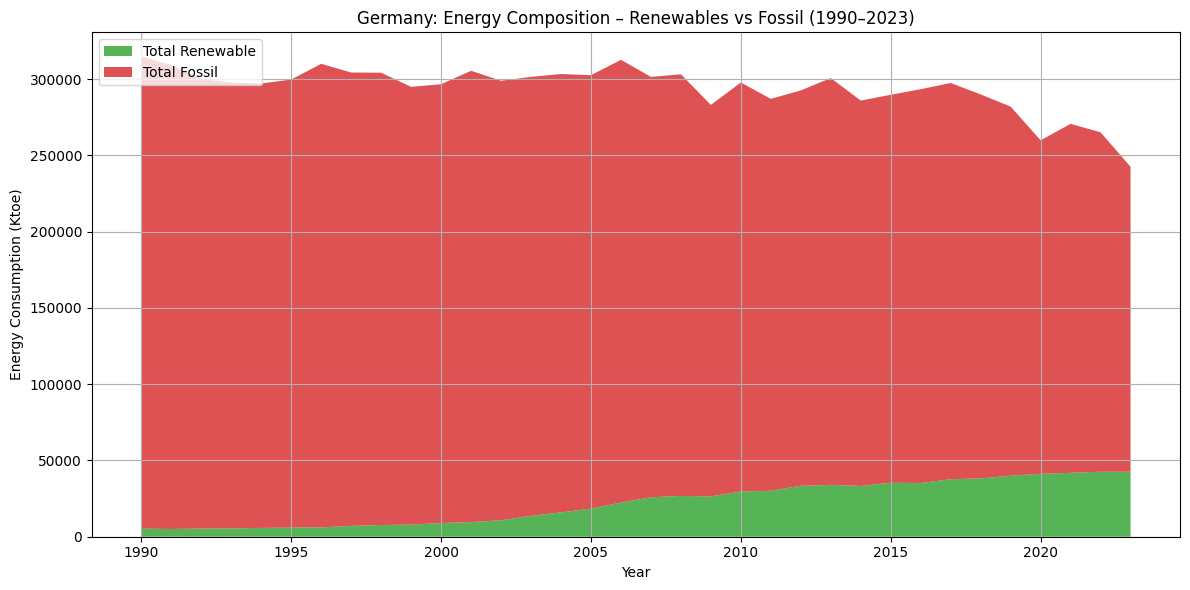

In [47]:
# Area Chart for Germany – Total Renewable vs Fossil



plt.figure(figsize=(12, 6))

plt.stackplot(
    germany_renew_fossil['TIME_PERIOD'],
    germany_renew_fossil['Total Renewable'],
    germany_renew_fossil['Total Fossil'],
    labels=['Total Renewable', 'Total Fossil'],
    colors=['#2ca02c', '#d62728'],  # Green for renewables, red for fossil
    alpha=0.8
)

plt.title("Germany: Energy Composition – Renewables vs Fossil (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("../visuals/germany_area_energy.png", bbox_inches='tight')
plt.show()


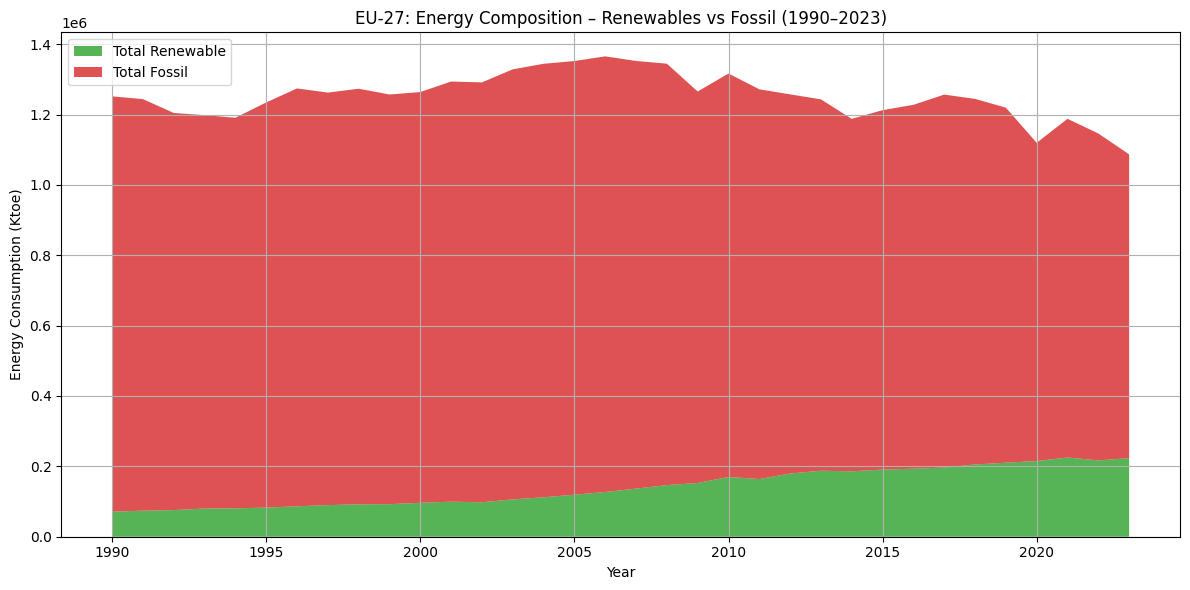

In [48]:
# Area Chart for EU – Total Renewable vs Fossil



plt.figure(figsize=(12, 6))

plt.stackplot(
    eu_renew_fossil['TIME_PERIOD'],
    eu_renew_fossil['Total Renewable'],
    eu_renew_fossil['Total Fossil'],
    labels=['Total Renewable', 'Total Fossil'],
    colors=['#2ca02c', '#d62728'],  # Green for renewables, red for fossil
    alpha=0.8
)

plt.title("EU-27: Energy Composition – Renewables vs Fossil (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("../visuals/eu_area_energy.png", bbox_inches='tight')
plt.show()



Saved: ../visuals/final_energy_mix_2023_by_fuel_grouped.png


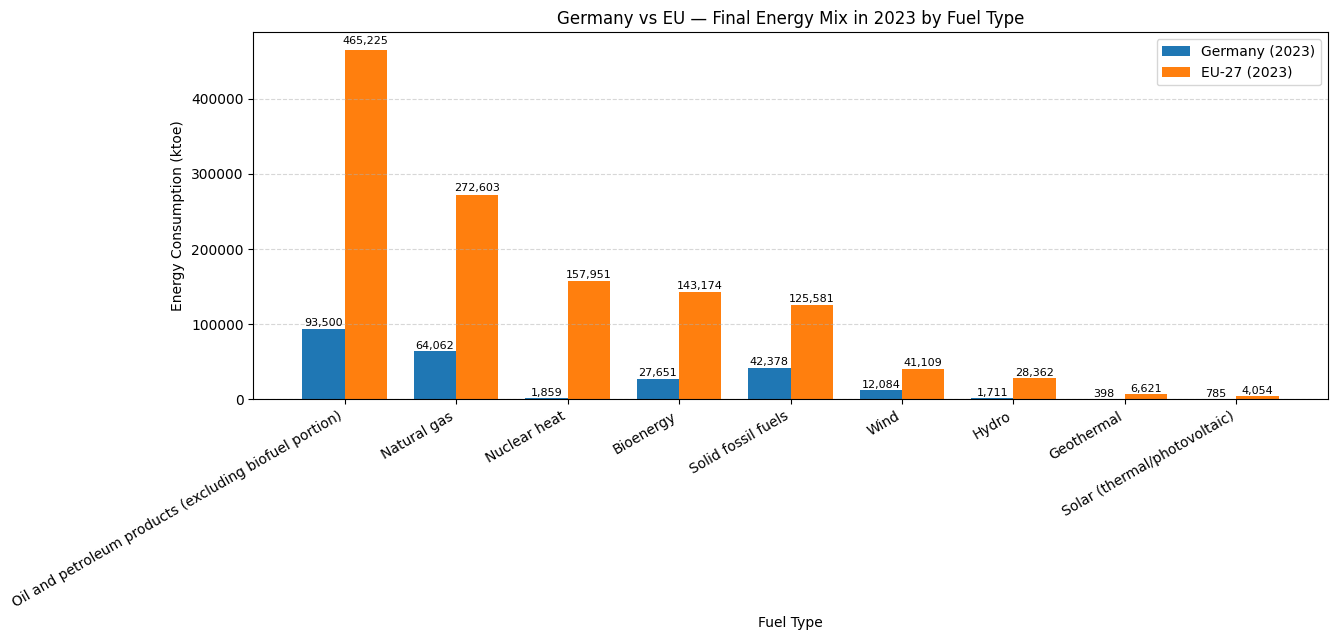

In [46]:
## 📊 Final Energy Mix in 2023 – Germany vs EU (Grouped Bar Chart)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def pick_year_row(pivot, year=2023):
    if (pivot["TIME_PERIOD"] == year).any():
        return year, pivot[pivot["TIME_PERIOD"] == year]
    # fallback to last available year
    last = int(pivot["TIME_PERIOD"].max())
    return last, pivot[pivot["TIME_PERIOD"] == last]

# Flexible matching: try to find the best column name that contains any token
def find_col(candidates, cols):
    cols_lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand in cols:  # exact
            return cand
        if cand.lower() in cols_lower:  # case-insensitive exact
            return cols_lower[cand.lower()]
    # contains match
    for c in cols:
        cl = c.lower()
        if any(tok in cl for tok in [x.lower() for x in candidates]):
            return c
    return None

# --- 2023 (or fallback) slice
yr_de, germany_yr = pick_year_row(germany_pivot, 2023)
yr_eu, eu_yr = pick_year_row(eu_pivot, 2023)

all_cols = [c for c in germany_pivot.columns if c != "TIME_PERIOD"]
# Define desired fuels (use flexible candidates for solar naming, etc.)
fuel_candidates = {
    "Solid fossil fuels": ["Solid fossil fuels","solid fossil","coal","lignite","hard coal"],
    "Oil and petroleum products (excluding biofuel portion)": ["Oil and petroleum products (excluding biofuel portion)","oil and petroleum","petroleum"],
    "Natural gas": ["Natural gas","gas"],
    "Nuclear heat": ["Nuclear heat","nuclear"],
    "Bioenergy": ["Bioenergy","bioenergy","primary solid biofuels","biogas","biofuel"],
    "Wind": ["Wind"],
    "Hydro": ["Hydro","hydroelectric"],
    "Solar (thermal/photovoltaic)": ["Solar thermal and photovoltaic","Solar thermal","Solar photovoltaic","Solar"],
    "Geothermal": ["Geothermal","ambient"]
}

resolved_cols = {}
for pretty, cands in fuel_candidates.items():
    col = find_col(cands, all_cols)
    if col is not None:
        resolved_cols[pretty] = col

# Build dataframe (drop fuels not found)
fuel_labels = list(resolved_cols.keys())
germany_values = germany_yr[[resolved_cols[f] for f in fuel_labels]].values.flatten().astype(float)
eu_values      = eu_yr[[resolved_cols[f] for f in fuel_labels]].values.flatten().astype(float)

energy_mix = pd.DataFrame({
    "Fuel Type": fuel_labels,
    f"Germany ({yr_de})": germany_values,
    f"EU-27 ({yr_eu})": eu_values
})

# Replace NaNs with 0 and sort by EU total (largest first) for readability
energy_mix = energy_mix.replace([np.inf, -np.inf], np.nan).fillna(0.0)
energy_mix = energy_mix.sort_values(by=f"EU-27 ({yr_eu})", ascending=False)

# Plot grouped bars
bar_width = 0.38
x = np.arange(len(energy_mix))
plt.figure(figsize=(13.5, 6.5))

g = plt.bar(x - bar_width/2, energy_mix[f"Germany ({yr_de})"], width=bar_width, label=f"Germany ({yr_de})")
e = plt.bar(x + bar_width/2, energy_mix[f"EU-27 ({yr_eu})"], width=bar_width, label=f"EU-27 ({yr_eu})")

plt.xlabel("Fuel Type")
plt.ylabel("Energy Consumption (ktoe)")
plt.title(f"Germany vs EU — Final Energy Mix in {yr_de if yr_de==yr_eu else f'{yr_de}/{yr_eu}'} by Fuel Type")
plt.xticks(x, energy_mix["Fuel Type"], rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

# Value labels with thousands separators
def add_labels(bars):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + max(50, h*0.01),
                 f"{int(round(h)):,}", ha='center', va='bottom', fontsize=8)

add_labels(g); add_labels(e)

plt.tight_layout()
os.makedirs("../visuals", exist_ok=True)
out_path = "../visuals/final_energy_mix_2023_by_fuel_grouped.png"
plt.savefig(out_path, dpi=300)
print("Saved:", out_path)
plt.show()


In [ ]:
##INSIGHTS

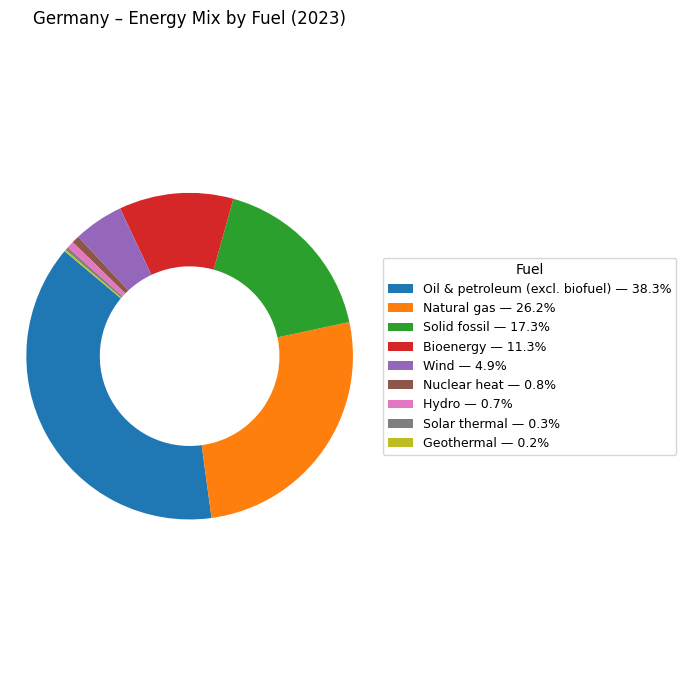

Saved: ../visuals/germany_energy_pie_2023_clean.png


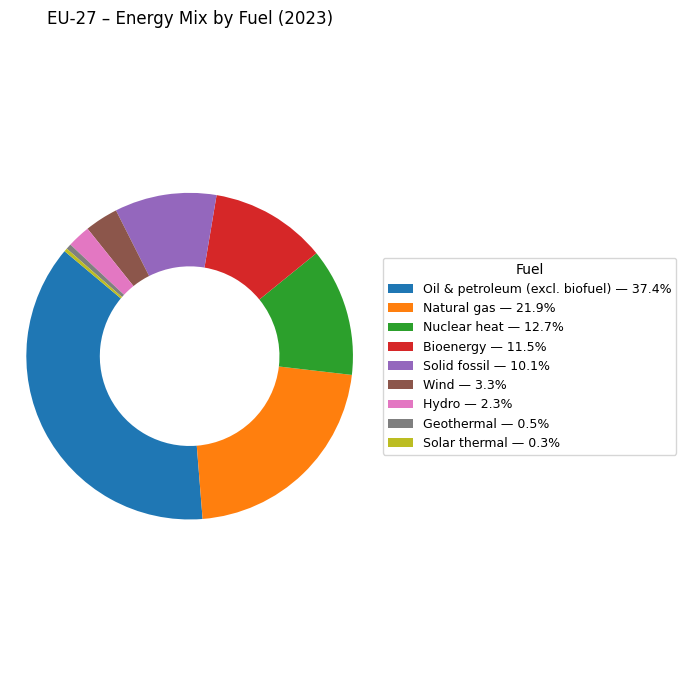

Saved: ../visuals/eu_energy_pie_2023_clean.png


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_pie_clean(series, title, out_path):
    # series: pandas Series (index = fuel labels, values = amounts)
    s = series.astype(float).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    s = s[s > 0].sort_values(ascending=False)

    total = s.sum()
    pct = (s / total * 100).round(1)

    # Shorten long labels a bit for legend readability
    def shorten(lbl):
        return (lbl
                .replace("Oil and petroleum products (excluding biofuel portion)", "Oil & petroleum (excl. biofuel)")
                .replace("Solar thermal and photovoltaic", "Solar (thermal+PV)")
                .replace("Solid fossil fuels", "Solid fossil"))
    legend_labels = [f"{shorten(l)} — {p:.1f}%" for l, p in zip(s.index, pct)]

    fig = plt.figure(figsize=(7, 7))
    # Donut (creates white hole so pie looks lighter + clearer)
    wedges, _ = plt.pie(
        s.values,
        labels=None,                  # no labels on wedges → no overlap
        startangle=140,
        wedgeprops=dict(width=0.45),  # donut thickness
        normalize=True                # robust if rounding issues
    )

    # Legend outside
    plt.legend(wedges, legend_labels, title="Fuel",
               loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=9)

    plt.title(title)
    plt.axis("equal")
    plt.tight_layout()
    os.makedirs("../visuals", exist_ok=True)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()
    print("Saved:", out_path)

# --- Use your existing series ---
plot_pie_clean(germany_fuel_mix, "Germany – Energy Mix by Fuel (2023)",
               "../visuals/germany_energy_pie_2023_clean.png")
plot_pie_clean(eu_fuel_mix, "EU-27 – Energy Mix by Fuel (2023)",
               "../visuals/eu_energy_pie_2023_clean.png")


In [ ]:
##############################